In [53]:
import numpy as np
import matplotlib.pyplot as plt

#atomic units scaling
q = -1 
m = 1

x0 = 0
x0_prime = 0

t = np.linspace(-1, 6, 100)

#defining the acceleration, velocity, and position. Obtained via integration from the newton's eqn of motion
def a(t, tb=1):
    return np.cos(t)

def v(t, tb):
    return (np.sin(t)- np.sin(tb))

def x(t, tb):
    return (-np.cos(t)+np.cos(tb)-np.sin(tb)*(t-tb))



In [54]:
#bisection root finding slightly customised to this problem
def bisection_method(tb, lower, upper, tol=1e-10, max_iter=100):
    if x(upper,tb) * x(lower,tb) > 0: # root existence condition
        raise ValueError("f(a) and f(b) must have opposite signs.")
    iterations = 0
    while abs(upper - lower) > tol and iterations < max_iter:
        mid = (upper + lower) / 2
        
        if x(mid,tb) == 0: # exact root found
            break
        elif x(lower,tb) * x(mid,tb) < 0:
            upper = mid
        else:
            lower = mid
        iterations += 1
    return mid

For tb=-1.0, electron does not return 
For tb=-0.8, electron does not return 
For tb=-0.6000000000000001, electron does not return 
For tb=-0.40000000000000013, electron does not return 
For tb=-0.20000000000000018, electron does not return 
For tb=-2.220446049250313e-16, electron does not return 


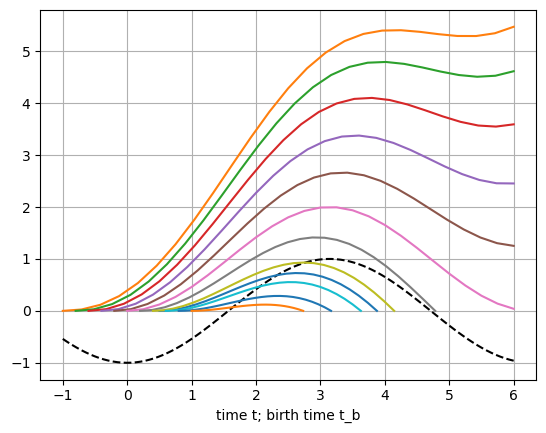

In [55]:
# part 1
tb_range = np.arange(-1, 1.1, 0.2)

plt.plot(t, -np.cos(t),"--k" ,label="Laser Field")
# plt.legend()
plt.grid()
plt.xlabel("time t; birth time t_b")


# Calculations for a single value of tb (EXTENDED TO ARRAY HEREAFTER)
tb= 0.5


tr = bisection_method(tb, 2,6)
t_range = np.linspace(tb, tr, 25)
plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")

for tb in tb_range:
    try:
        tr = bisection_method(tb, 2, 6)
    except:
        print(f"For tb={tb}, electron does not return ")
        t_range = np.linspace(tb, 6, 25)
    else:
        # print(tb, tr)
        tr = bisection_method(tb, 2,6)
        t_range = np.linspace(tb, tr, 25)
    plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")
    
    
    # t_range = np.linspace(tb, 6, 25)
    # plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")
    
    
    


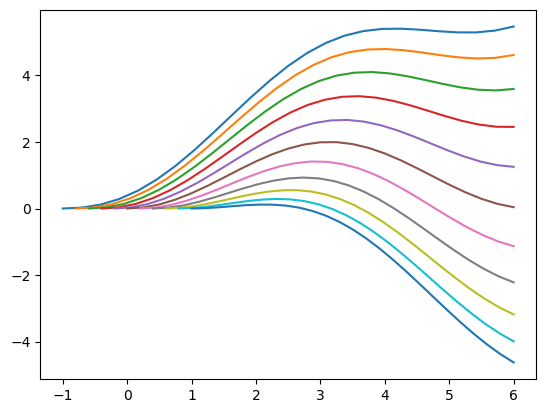

In [56]:
# demo run of trajectories

for tb in tb_range:
    t_range = np.linspace(tb, 6, 25)
    plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")